# Vector feild plot / Stream plot

$$ \dot x = x + \exp(-y) $$
$$ \dot y = - y  $$
* Only fixed point is (-1, 0)

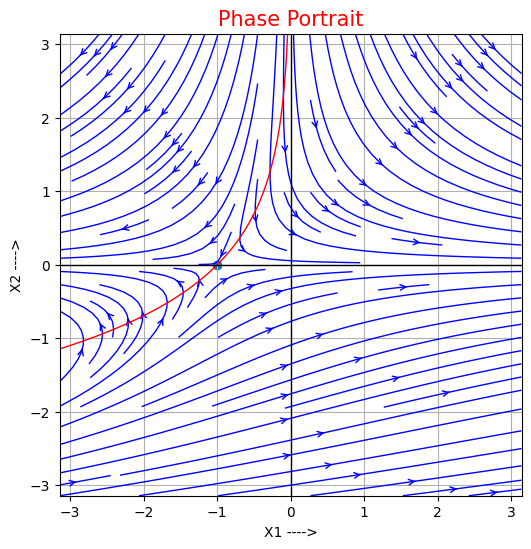

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
x, y = np.meshgrid(np.arange(-np.pi, np.pi, 0.01), np.arange(-np.pi, np.pi, 0.01))

# Define the vector field components
u = x + np.exp(-y)  # dx/dt
v = -y              # dy/dt

# Create the phase portrait (streamline plot)
plt.figure(figsize=(6, 6))
plt.streamplot(x, y, u, v, color="b", linewidth=1, density=1.2, arrowstyle="->")
x1 = np.arange(-np.pi, -0.01, 0.01)
plt.plot(x1, -np.log(-x1), color='r',linewidth=1)
plt.scatter(-1,0)
# Labels and Title
plt.title("Phase Portrait", fontsize=15, color="r")
plt.xlabel("X1 ---->")
plt.ylabel("X2 ---->")
plt.axhline(0, color='black',linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black',linewidth=1)  # Vertical line at x=0


# Set axis properties
plt.axis("tight")
plt.axis("square")
plt.grid(True)
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
# Show the plot
plt.show()


## Differential equn solve

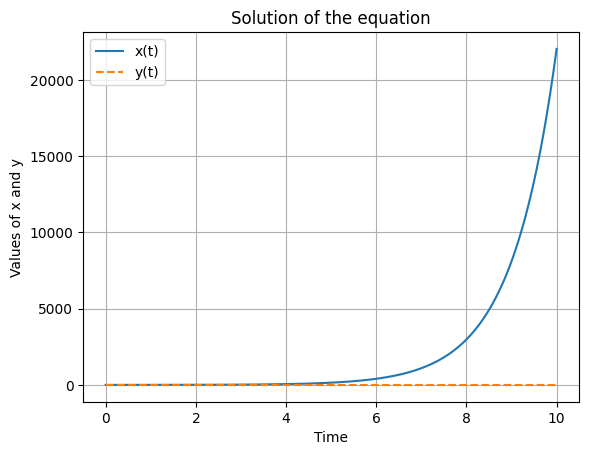

In [95]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 


def f(u, t):  # u = [x, y], t = time
    x, y = u
    dxdt = x + np.exp(-y)
    dydt = - y
    return [dxdt, dydt]

# Define the time range and initial conditions
t = np.linspace(0, 10, 1000)  # Time range
x0 = [-0, 0]  # Initial conditions: [x(0), y(0)]

# Solve the system of ODEs
soln = odeint(f, x0, t)

# Plot the solution
plt.plot(t, soln[:, 0], label="x(t)")
plt.plot(t, soln[:, 1], label="y(t)", linestyle='dashed')
plt.title("Solution of the equation")
plt.xlabel("Time")
plt.ylabel("Values of x and y")
plt.grid()
plt.legend()
plt.show()


# How initial points are changing/moving through phase space 

<class 'numpy.ndarray'>
(12, 2)


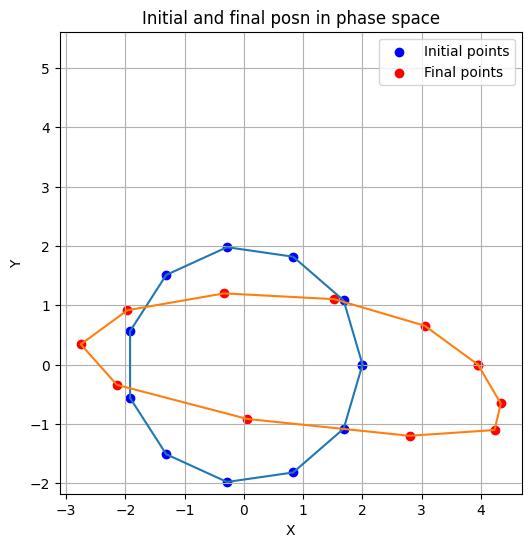

In [148]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 


def fun(t,x0):
    def f(u, t):  # u = [x, y], t = time
        x, y = u
        dxdt = x + np.exp(-y)
        dydt = - y
        return [dxdt, dydt]
    # Solve the system of ODEs
    soln = odeint(f, x0, t)
    return soln[-1, 0],soln[-1, 1]

# Define the time range and initial conditions
t = np.linspace(0, .5, 4)  # Time range

num_points = 12
r0 = [0,0]
r = 2.0
theta = np.linspace(0, 2 * np.pi, num_points, endpoint=True)
x0 = np.column_stack((r0[0]+r*np.cos(theta), r0[1]+r*np.sin(theta)))

#x0 = np.array([[0, 0],[0,1],[1,1]]) 
print(type(x0))

n = len(x0)  # Number of initial conditions
xf = [] 
for points in x0:
    x1 = fun(t,points)
    xf.append(x1)
    
xf = np.vstack(xf)  # Convert list to NumPy array
print(xf.shape)

plt.figure(figsize=(12, 6))
for i in range(n): 
    if i == 0:
        plt.scatter(x0[i, 0], x0[i, 1], label="Initial points", color='blue')
    else:
        plt.scatter(x0[i, 0], x0[i, 1], color='blue') 

    if i == 0:
        plt.scatter(xf[i, 0], xf[i, 1], label="Final points", color='red')
    else:
        plt.scatter(xf[i, 0], xf[i, 1], color='red') 

plt.plot(x0[:,0],x0[:,1])
plt.plot(xf[:,0],xf[:,1])
plt.title("Initial and final posn in phase space")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.axis("tight")
plt.axis("square")
plt.show()


<class 'numpy.ndarray'>
(16, 2)


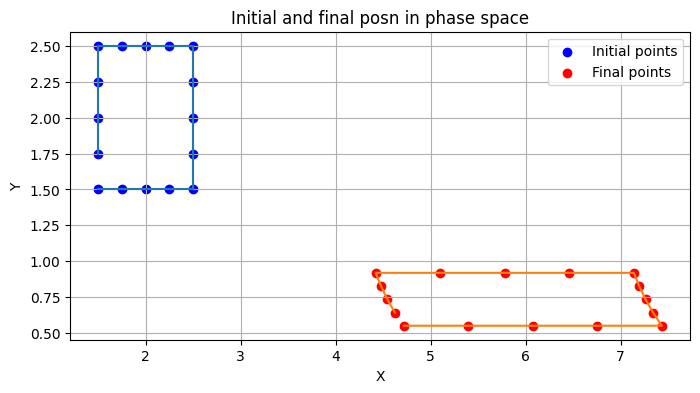

In [151]:

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 


def fun(t,x0):
    def f(u, t):  # u = [x, y], t = time
        x, y = u
        dxdt = x + np.exp(-y)
        dydt = - y
        return [dxdt, dydt]
    # Solve the system of ODEs
    soln = odeint(f, x0, t)
    return soln[-1, 0],soln[-1, 1]

# Define the time range and initial conditions
t = np.linspace(0, 1, 100)  # Time range









# Number of points on the square boundary
num_points = 16  

# Compute points along the boundary of the square
side_points = num_points // 4  # Points per side

# Bottom edge (y = 1.5, x varies)
x_bottom = np.linspace(1.5, 2.5, side_points, endpoint=False)
y_bottom = np.full_like(x_bottom, 1.5)

# Right edge (x = 2.5, y varies)
y_right = np.linspace(1.5, 2.5, side_points, endpoint=False)
x_right = np.full_like(y_right, 2.5)

# Top edge (y = 2.5, x varies)
x_top = np.linspace(2.5, 1.5, side_points, endpoint=False)
y_top = np.full_like(x_top, 2.5)

# Left edge (x = 1.5, y varies)
y_left = np.linspace(2.5, 1.5, side_points, endpoint=False)
x_left = np.full_like(y_left, 1.5)

# Combine all points into x0
x0 = np.column_stack((
    np.concatenate([x_bottom, x_right, x_top, x_left]),  # X-coordinates
    np.concatenate([y_bottom, y_right, y_top, y_left])   # Y-coordinates
))






print(type(x0))

n = len(x0)  # Number of initial conditions
xf = [] 
for points in x0:
    x1 = fun(t,points)
    xf.append(x1)
    
xf = np.vstack(xf)  # Convert list to NumPy array
print(xf.shape)

plt.figure(figsize=(8, 4))
for i in range(n): 
    if i == 0:
        plt.scatter(x0[i, 0], x0[i, 1], label="Initial points", color='blue')
    else:
        plt.scatter(x0[i, 0], x0[i, 1], color='blue') 

    if i == 0:
        plt.scatter(xf[i, 0], xf[i, 1], label="Final points", color='red')
    else:
        plt.scatter(xf[i, 0], xf[i, 1], color='red') 

plt.plot(x0[:,0],x0[:,1])
plt.plot(xf[:,0],xf[:,1])
plt.title("Initial and final posn in phase space")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.axis("tight")
#plt.axis("square")
plt.show()



# Vector feild plot using arrow

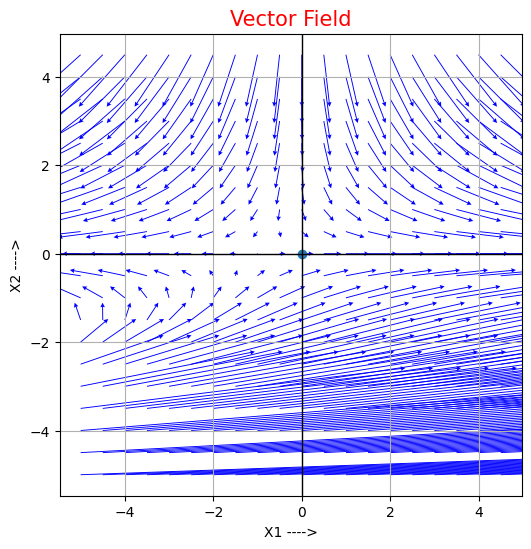

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
X, Y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))

# Define the vector field
U = X + np.exp(-Y)  # dx/dt
V = -Y              # dy/dt

# Create quiver plot with modified arrow properties
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, color='blue', scale=40, width=0.002, headwidth=5, headlength=5)
plt.scatter ( 0,0)
# Labels and Title
plt.title("Vector Field", fontsize=15, color="r")
plt.xlabel("X1 ---->")
plt.ylabel("X2 ---->")
plt.axhline(0, color='black',linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black',linewidth=1)  # Vertical line at x=0

# Axis settings
plt.axis("tight")
plt.axis("square")
plt.grid(True)

# Show the plot
plt.show()


# Another equation
$$ \dot x = 4y^2 - x^2 $$
$$ \dot y = 2y - 2  $$
* This system has two fixed point (-2,1) and (2,1)

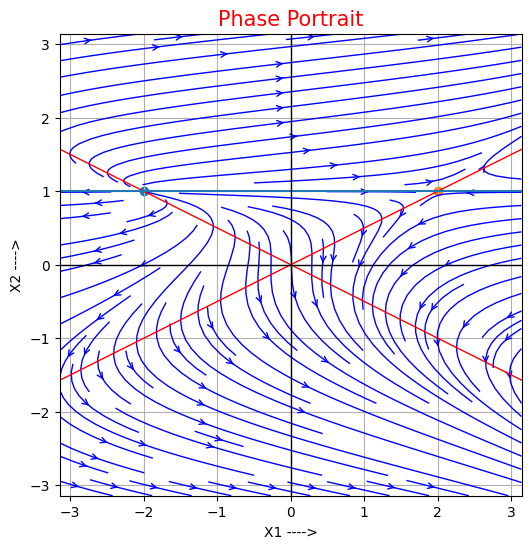

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
x, y = np.meshgrid(np.arange(-np.pi, np.pi, 0.01), np.arange(-np.pi, np.pi, 0.01))

# Define the vector field components
u = 4*y**2 - x**2  # dx/dt
v = 2*y - 2              # dy/dt

# Create the phase portrait (streamline plot)
plt.figure(figsize=(6, 6))
plt.streamplot(x, y, u, v, color="b", linewidth=1, density=1.2, arrowstyle="->")
x1 = np.arange(-np.pi, np.pi, 0.01)
plt.plot(x1, -x1/2, color='r',linewidth=1)
plt.plot(x1, x1/2, color='r',linewidth=1)
plt.scatter(-2,1)
plt.scatter(2,1)
plt.axhline(1)
# Labels and Title
plt.title("Phase Portrait", fontsize=15, color="r")
plt.xlabel("X1 ---->")
plt.ylabel("X2 ---->")
plt.axhline(0, color='black',linewidth=1)  # Horizontal line at y=0
plt.axvline(0, color='black',linewidth=1)  # Vertical line at x=0


# Set axis properties
plt.axis("tight")
plt.axis("square")
plt.grid(True)
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
# Show the plot
plt.show()


## Slove above equation and 

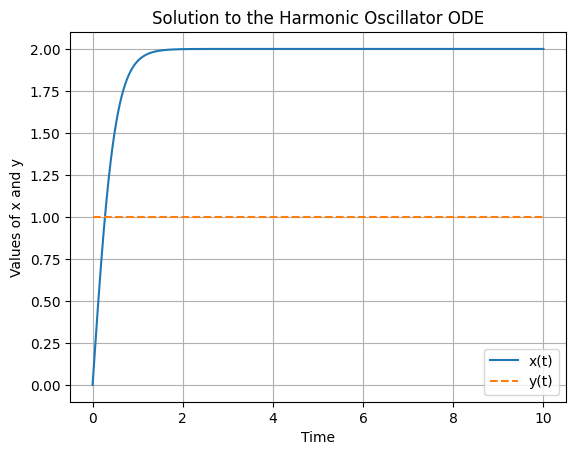

In [88]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt 

# Define the system of ODEs: x'' + x = 0, rewritten as a system of first-order equations
# Let x = u[0] and y = u[1] (where y = dx/dt)
def f(u, t):  # u = [x, y], t = time
    x, y = u
    dxdt = 4*y**2 - x**2
    dydt = 2*y - 2 
    return [dxdt, dydt]

# Define the time range and initial conditions
t = np.linspace(0, 10, 1000)  # Time range
x0 = [0, 1]  # Initial conditions: [x(0), y(0)]

# Solve the system of ODEs
soln = odeint(f, x0, t)

# Plot the solution
plt.plot(t, soln[:, 0], label="x(t)")
plt.plot(t, soln[:, 1], label="y(t)", linestyle='dashed')
plt.title("Solution to the Harmonic Oscillator ODE")
plt.xlabel("Time")
plt.ylabel("Values of x and y")
plt.grid()
plt.legend()
plt.show()
